In [1]:
import folium
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import matplotlib.font_manager as fm

# 한국어 출력을 위한 폰트 설정
plt.rc('font', family='NanumGothic') 

# 마이너스 기호가 깨지는 것을 방지
plt.rcParams['axes.unicode_minus'] = False

In [3]:
gdf = gpd.read_file("data/seoul_geo/seoul_geo.shp", encoding='utf-8')

In [4]:
gdf

,id,pop,total_b,res_single,res_multi,b_over_20,EMD_CD,EMD_KOR_NM,geometry
0,1,364.0,13.0,3.0,4.0,NaN,11560111,당산동1가,"POLYGON ((126.89910 37.51987, 126.89909 37.520..."
1,2,448.0,21.0,3.0,18.0,16.0,11590108,대방동,"POLYGON ((126.92866 37.50109, 126.92866 37.501..."
2,3,426.0,2.0,NaN,2.0,NaN,11710109,장지동,"POLYGON ((127.13469 37.47576, 127.13469 37.476..."
3,4,215.0,10.0,1.0,6.0,NaN,11470103,신월동,"POLYGON ((126.84134 37.52497, 126.84133 37.525..."
4,5,52.0,17.0,3.0,NaN,13.0,11680105,삼성동,"POLYGON ((127.04400 37.51060, 127.04400 37.511..."
...,...,...,...,...,...,...,...,...,...
61642,61643,NaN,NaN,NaN,NaN,NaN,11350105,상계동,"POLYGON ((127.08835 37.67661, 127.08834 37.677..."
61643,61644,NaN,NaN,NaN,NaN,NaN,11500109,방화동,"POLYGON ((126.81818 37.58252, 126.81817 37.583..."
61644,61645,NaN,NaN,NaN,NaN,NaN,11350102,월계동,"POLYGON ((127.06374 37.61794, 127.06374 37.618..."
61645,61646,NaN,NaN,NaN,NaN,NaN,11650109,내곡동,"POLYGON ((127.06813 37.44669, 127.06813 37.447..."


In [5]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
# CRS 변환
gdf_3857 = gdf.to_crs('EPSG:3857')

# 변환된 CRS에서 각 폴리곤의 중심점 계산
gdf_3857['center'] = gdf_3857.geometry.centroid

# 결과를 원래 CRS로 변환
gdf['center'] = gdf_3857['center'].to_crs('EPSG:4326')

gdf

,id,pop,total_b,res_single,res_multi,b_over_20,EMD_CD,EMD_KOR_NM,geometry,center
0,1,364.0,13.0,3.0,4.0,NaN,11560111,당산동1가,"POLYGON ((126.89910 37.51987, 126.89909 37.520...",POINT (126.89966 37.52032)
1,2,448.0,21.0,3.0,18.0,16.0,11590108,대방동,"POLYGON ((126.92866 37.50109, 126.92866 37.501...",POINT (126.92923 37.50154)
2,3,426.0,2.0,NaN,2.0,NaN,11710109,장지동,"POLYGON ((127.13469 37.47576, 127.13469 37.476...",POINT (127.13526 37.47621)
3,4,215.0,10.0,1.0,6.0,NaN,11470103,신월동,"POLYGON ((126.84134 37.52497, 126.84133 37.525...",POINT (126.84190 37.52542)
4,5,52.0,17.0,3.0,NaN,13.0,11680105,삼성동,"POLYGON ((127.04400 37.51060, 127.04400 37.511...",POINT (127.04457 37.51105)
...,...,...,...,...,...,...,...,...,...,...
61642,61643,NaN,NaN,NaN,NaN,NaN,11350105,상계동,"POLYGON ((127.08835 37.67661, 127.08834 37.677...",POINT (127.08891 37.67706)
61643,61644,NaN,NaN,NaN,NaN,NaN,11500109,방화동,"POLYGON ((126.81818 37.58252, 126.81817 37.583...",POINT (126.81874 37.58298)
61644,61645,NaN,NaN,NaN,NaN,NaN,11350102,월계동,"POLYGON ((127.06374 37.61794, 127.06374 37.618...",POINT (127.06431 37.61839)
61645,61646,NaN,NaN,NaN,NaN,NaN,11650109,내곡동,"POLYGON ((127.06813 37.44669, 127.06813 37.447...",POINT (127.06870 37.44715)


In [7]:
# 시군구 코드 추출
gdf['SIG_CD'] = gdf['EMD_CD'].astype(str).str.slice(0, 5)

gdf.head()

,id,pop,total_b,res_single,res_multi,b_over_20,EMD_CD,EMD_KOR_NM,geometry,center,SIG_CD
0,1,364.0,13.0,3.0,4.0,NaN,11560111,당산동1가,"POLYGON ((126.89910 37.51987, 126.89909 37.520...",POINT (126.89966 37.52032),11560
1,2,448.0,21.0,3.0,18.0,16.0,11590108,대방동,"POLYGON ((126.92866 37.50109, 126.92866 37.501...",POINT (126.92923 37.50154),11590
2,3,426.0,2.0,NaN,2.0,NaN,11710109,장지동,"POLYGON ((127.13469 37.47576, 127.13469 37.476...",POINT (127.13526 37.47621),11710
3,4,215.0,10.0,1.0,6.0,NaN,11470103,신월동,"POLYGON ((126.84134 37.52497, 126.84133 37.525...",POINT (126.84190 37.52542),11470
4,5,52.0,17.0,3.0,NaN,13.0,11680105,삼성동,"POLYGON ((127.04400 37.51060, 127.04400 37.511...",POINT (127.04457 37.51105),11680


In [8]:
# 시군구 코드와 시군구 이름을 매핑하는 사전
sig_cd_to_name = {
    '11110': '종로구',
    '11140': '중구',
    '11170': '용산구',
    '11200': '성동구',
    '11215': '광진구',
    '11230': '동대문구',
    '11260': '중랑구',
    '11290': '성북구',
    '11305': '강북구',
    '11320': '도봉구',
    '11350': '노원구',
    '11380': '은평구',
    '11410': '서대문구',
    '11440': '마포구',
    '11470': '양천구',
    '11500': '강서구',
    '11530': '구로구',
    '11545': '금천구',
    '11560': '영등포구',
    '11590': '동작구',
    '11620': '관악구',
    '11650': '서초구',
    '11680': '강남구',
    '11710': '송파구',
    '11740': '강동구'
}

In [9]:
# 시군구 이름 열 추가
gdf['SIG_NM'] = gdf['SIG_CD'].map(sig_cd_to_name)

In [10]:
gdf.head()

,id,pop,total_b,res_single,res_multi,b_over_20,EMD_CD,EMD_KOR_NM,geometry,center,SIG_CD,SIG_NM
0,1,364.0,13.0,3.0,4.0,NaN,11560111,당산동1가,"POLYGON ((126.89910 37.51987, 126.89909 37.520...",POINT (126.89966 37.52032),11560,영등포구
1,2,448.0,21.0,3.0,18.0,16.0,11590108,대방동,"POLYGON ((126.92866 37.50109, 126.92866 37.501...",POINT (126.92923 37.50154),11590,동작구
2,3,426.0,2.0,NaN,2.0,NaN,11710109,장지동,"POLYGON ((127.13469 37.47576, 127.13469 37.476...",POINT (127.13526 37.47621),11710,송파구
3,4,215.0,10.0,1.0,6.0,NaN,11470103,신월동,"POLYGON ((126.84134 37.52497, 126.84133 37.525...",POINT (126.84190 37.52542),11470,양천구
4,5,52.0,17.0,3.0,NaN,13.0,11680105,삼성동,"POLYGON ((127.04400 37.51060, 127.04400 37.511...",POINT (127.04457 37.51105),11680,강남구


In [11]:
# 열 이름 변경
gdf = gdf.rename(columns={
    'id': '아이디',
    'pop': '인구 수',
    'total_b': '건물 수',
    'res_single': '단독 주택 수',
    'res_multi': '다세대 주택 수',
    'b_over_20': '노후 건물 수',
    'EMD_CD': '읍면동 코드',
    'EMD_KOR_NM': '동 이름',
    'geometry': 'geometry',
    'center': '중심',
    'SIG_CD': '시군구 코드',
    'SIG_NM': '구 이름'
})

In [12]:
gdf.head()

,아이디,인구 수,건물 수,단독 주택 수,다세대 주택 수,노후 건물 수,읍면동 코드,동 이름,geometry,중심,시군구 코드,구 이름
0,1,364.0,13.0,3.0,4.0,NaN,11560111,당산동1가,"POLYGON ((126.89910 37.51987, 126.89909 37.520...",POINT (126.89966 37.52032),11560,영등포구
1,2,448.0,21.0,3.0,18.0,16.0,11590108,대방동,"POLYGON ((126.92866 37.50109, 126.92866 37.501...",POINT (126.92923 37.50154),11590,동작구
2,3,426.0,2.0,NaN,2.0,NaN,11710109,장지동,"POLYGON ((127.13469 37.47576, 127.13469 37.476...",POINT (127.13526 37.47621),11710,송파구
3,4,215.0,10.0,1.0,6.0,NaN,11470103,신월동,"POLYGON ((126.84134 37.52497, 126.84133 37.525...",POINT (126.84190 37.52542),11470,양천구
4,5,52.0,17.0,3.0,NaN,13.0,11680105,삼성동,"POLYGON ((127.04400 37.51060, 127.04400 37.511...",POINT (127.04457 37.51105),11680,강남구


In [13]:
# 'center' 컬럼의 각 지오메트리를 WKT 문자열로 변환하여 새로운 컬럼에 저장
gdf['center_wkt'] = gdf['중심'].apply(lambda x: x.wkt)

# 필요한 경우, 이제 'center' 지오메트리 컬럼을 제거할 수 있습니다
gdf = gdf.drop(columns=['중심'])

In [14]:
# 'center'를 활성 지오메트리로 설정하고 저장 (이미 활성 지오메트리로 설정되어 있다면 생략 가능)
gdf = gdf.set_geometry('geometry')
gdf.to_file("data/서울_그리드_중심.shp")

SchemaError: Failed to create field name '아이디': cannot convert to ISO-8859-1

In [ ]:
# 시군구로 그룹화
gdf_sig = gdf.groupby('SIG_NM').agg({'pop': 'sum', 'total_b': 'sum', 'res_single':'sum', 'res_multi':'sum', 'b_over_20':'sum'})

In [ ]:
gdf_sig

In [ ]:
gdf_sig = gdf_sig.reset_index()

fig = px.bar(gdf_sig, x='SIG_NM', y='pop',
            title='시군구 인구 수',
            labels={'SIG_NM': '시군구', 'pop': '인구수'})
fig.show()

In [ ]:
fig = px.bar(gdf_sig, x='SIG_NM', y='total_b',
            title='시군구 건물 수',
            labels={'SIG_NM': '시군구', 'total_b': '건물수'})
fig.show()

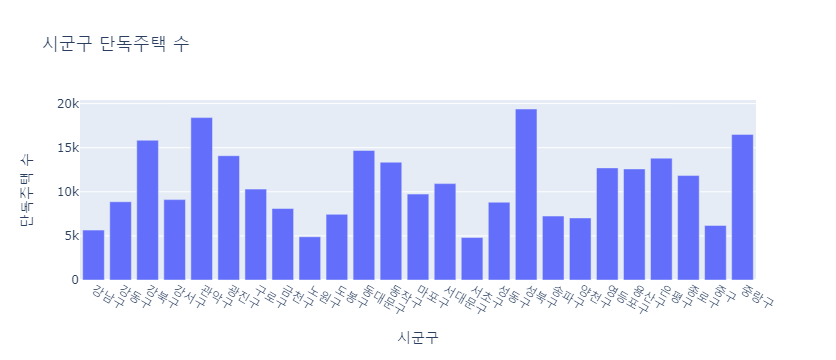

In [22]:
fig = px.bar(gdf_sig, x='SIG_NM', y='res_single',
            title='시군구 단독주택 수',
            labels={'SIG_NM': '시군구', 'res_single': '단독주택 수'})
fig.show()

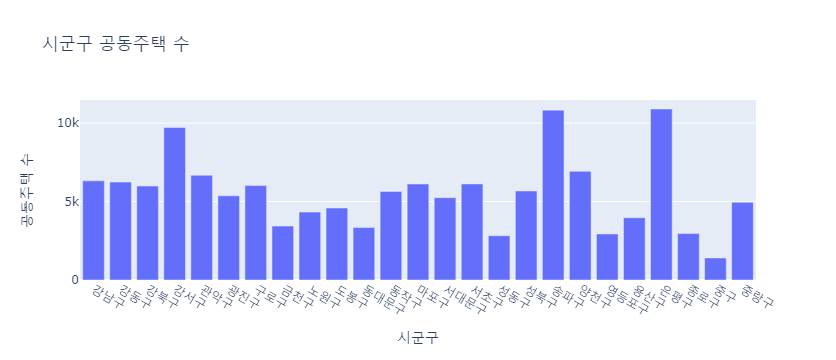

In [23]:
fig = px.bar(gdf_sig, x='SIG_NM', y='res_multi',
            title='시군구 공동주택 수',
            labels={'SIG_NM': '시군구', 'res_multi': '공동주택 수'})
fig.show()

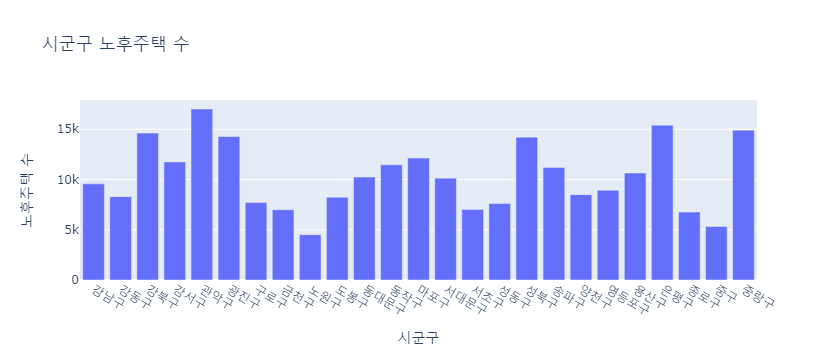

In [24]:
fig = px.bar(gdf_sig, x='SIG_NM', y='b_over_20',
            title='시군구 노후주택 수',
            labels={'SIG_NM': '시군구', 'b_over_20': '노후주택 수'})
fig.show()

In [20]:
# 데이터프레임을 크기순으로 정렬
gdf_sig_sorted = gdf_sig.sort_values(by='pop', ascending=False)